In [1]:
import os
import sys
import time
import itertools
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [ ]:
color_names = np.array([
    'dodgerblue',
    'cyan',
    'mediumaquamarine',
    'blueviolet',
    'orange',
    'gold',
    'olive',
    'lightcoral',
    'orangered',
    'forestgreen',
    'grey',
    'black',
    'tan',
    'blue',
    'darkslatteblue'
])

In [252]:
train_df = pd.read_csv('raw_data/train_features.csv')
train_target = pd.read_csv('raw_data/train_targets.csv')
target_columns = train_target.drop(['timestamp'], axis=1).columns.values
feature_columns = train_df.drop(['timestamp'], axis=1).columns.values
# Джоиним фичи и таргет
train_df = train_df.merge(train_target, on=['timestamp'], how='left')
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

test_df = pd.read_csv('raw_data/test_features.csv')
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
all_df = pd.concat([train_df, test_df], axis=0).sort_values(['timestamp'], ascending=True)
print('train_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (5808, 15)
test_df.shape: (3984, 11)


In [27]:
for col in train_df.drop(target_columns, axis=1).columns:
    print(col)
    print(' '*2, 'train_df:')
    print(' '*5, 'unq_vals:', len(train_df[col].unique()))
    print(' '*5, "NaN's:", f"{round(train_df[col].isnull().mean() * 100, 2)}%")
    print(' '*2, 'test_df:')
    print(' '*5, 'unq_vals:', len(test_df[col].unique()))
    print(' '*5, "NaN's:", f"{round(test_df[col].isnull().mean() * 100, 2)}%")
    print('='*100)
    print()
    

timestamp
   train_df:
      unq_vals: 5808
      NaN's: 0.0%
   test_df:
      unq_vals: 3984
      NaN's: 0.0%

A_rate
   train_df:
      unq_vals: 5808
      NaN's: 0.02%
   test_df:
      unq_vals: 2843
      NaN's: 28.66%

A_CH4
   train_df:
      unq_vals: 4843
      NaN's: 16.51%
   test_df:
      unq_vals: 3529
      NaN's: 11.45%

A_C2H6
   train_df:
      unq_vals: 4844
      NaN's: 16.51%
   test_df:
      unq_vals: 3533
      NaN's: 11.32%

A_C3H8
   train_df:
      unq_vals: 4842
      NaN's: 16.51%
   test_df:
      unq_vals: 3531
      NaN's: 11.35%

A_iC4H10
   train_df:
      unq_vals: 4836
      NaN's: 16.51%
   test_df:
      unq_vals: 3531
      NaN's: 11.35%

A_nC4H10
   train_df:
      unq_vals: 4839
      NaN's: 16.51%
   test_df:
      unq_vals: 3528
      NaN's: 11.35%

A_iC5H12
   train_df:
      unq_vals: 4844
      NaN's: 16.51%
   test_df:
      unq_vals: 3529
      NaN's: 11.45%

A_nC5H12
   train_df:
      unq_vals: 4843
      NaN's: 16.51%
   test_df:
  

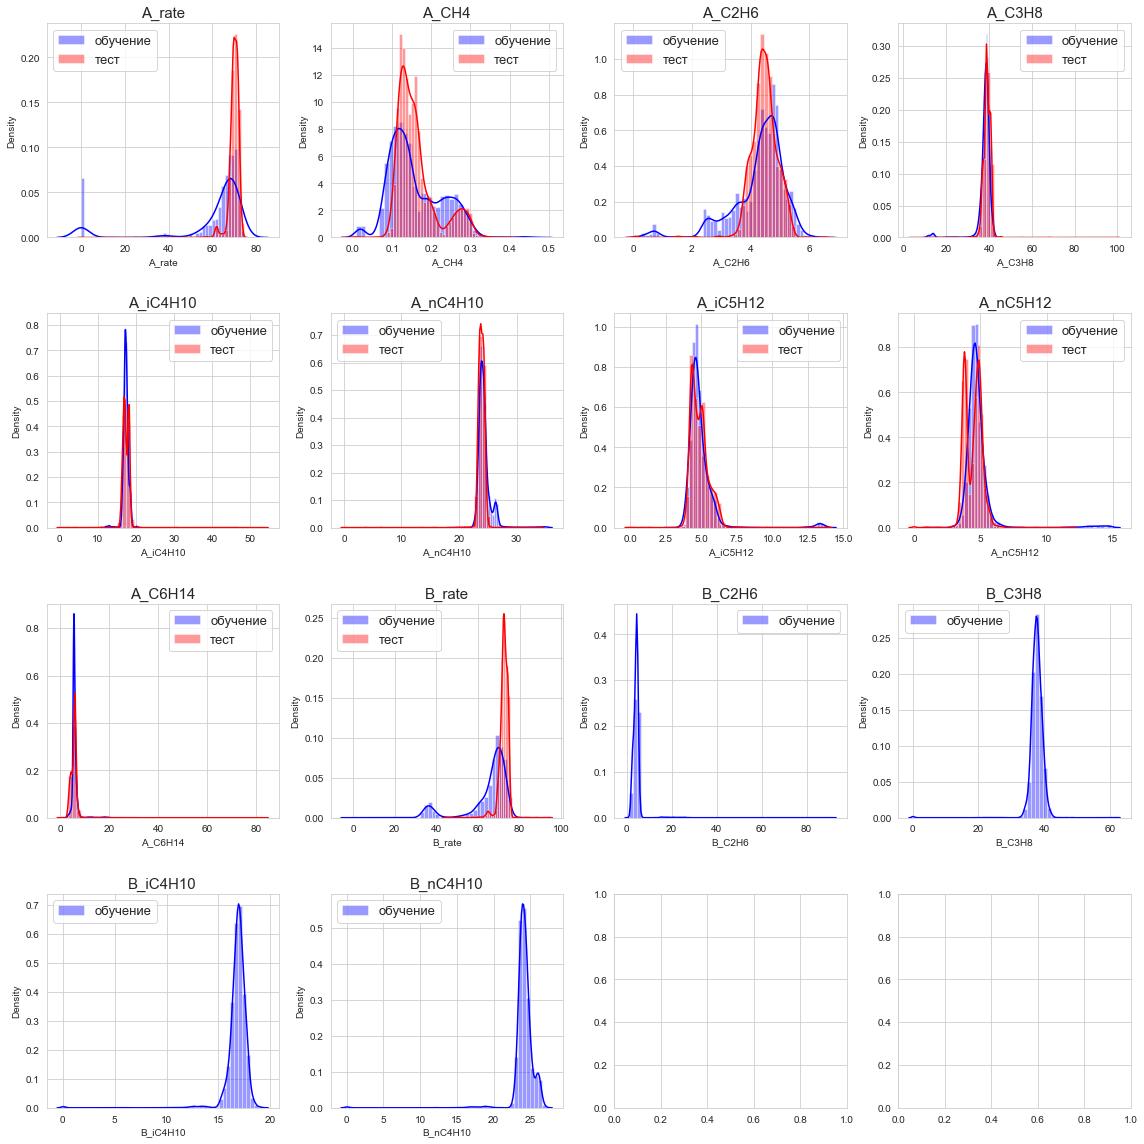

In [66]:
# Распределение значений фичей в обучении и тесте
nrows = 4
columns = train_df.drop(['timestamp'], axis=1).columns

ncols = len(columns) // nrows if len(columns) % nrows == 0 else len(columns) // nrows + 1

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))

for k, (row, col) in tqdm(enumerate(itertools.product(range(nrows), range(ncols)))):
    if k == len(columns):
        break
    col_name = columns[k]
    ax[row, col].set_title(col_name, fontsize=15);
    sns.distplot(train_df[col_name], color='blue', label='обучение', ax=ax[row, col]);
    if col_name not in target_columns:
        sns.distplot(test_df[col_name], color='red', label='тест', ax=ax[row, col]);
    ax[row, col].legend(fontsize=13);
fig.tight_layout(h_pad=3);

Распределение значений фичей в обучении и тесте


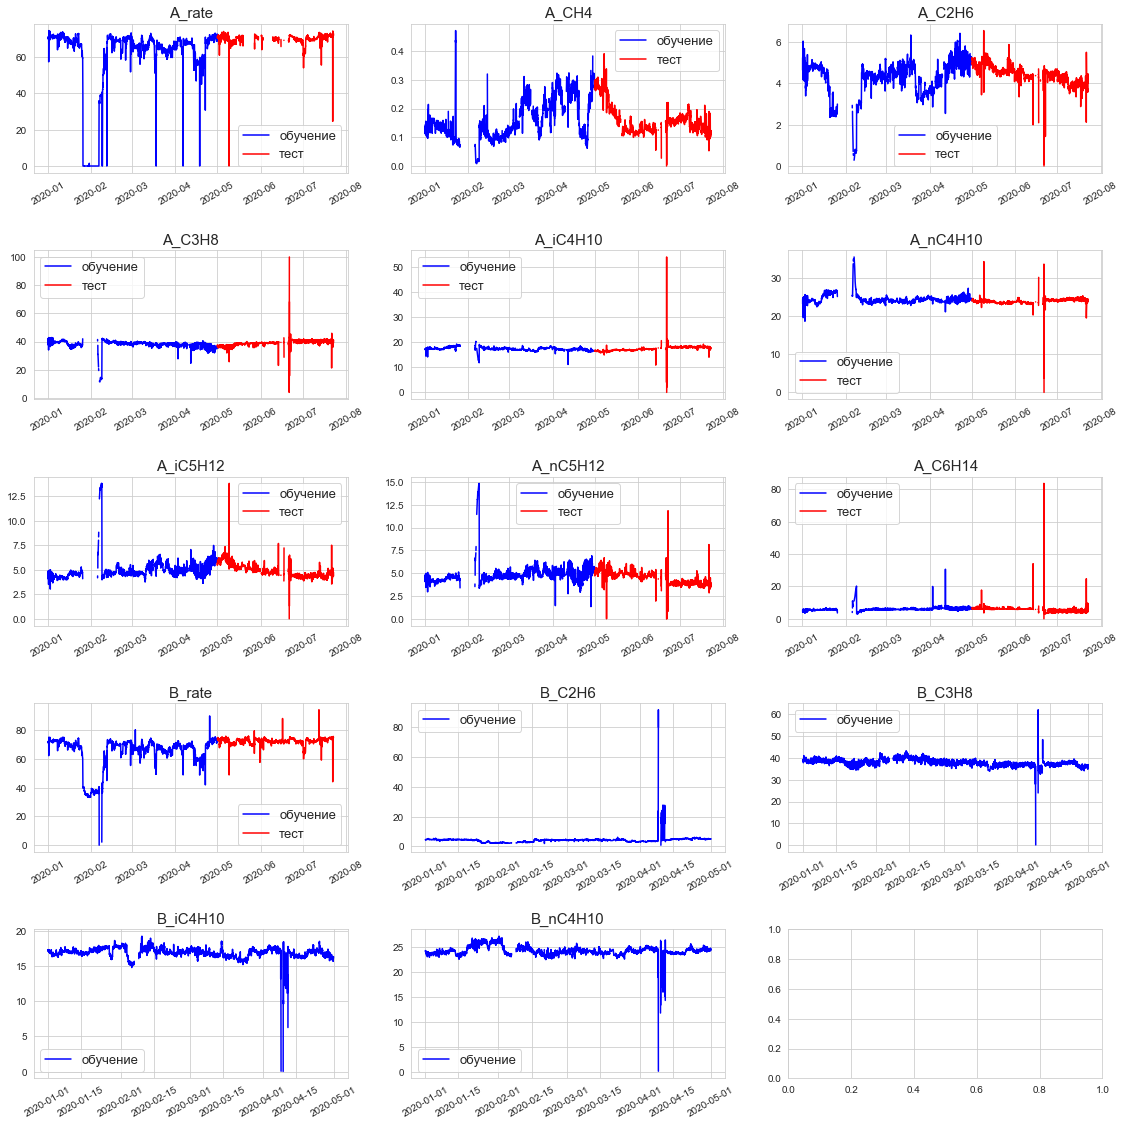

In [103]:
# Распределение значений фичей в обучении и тесте
tmp_df = pd.concat([
    train_df.assign(train_flag=1),
    test_df.assign(train_flag=0)
], axis=0).sort_values(['timestamp'], ascending=True)
tmp_df['timestamp'] = pd.to_datetime(tmp_df['timestamp'])

ncols = 3
columns = train_df.drop(['timestamp'], axis=1).columns

nrows = len(columns) // ncols if len(columns) % ncols == 0 else len(columns) // ncols + 1

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
print(f'Распределение значений фичей в обучении и тесте')

for k, (row, col) in tqdm(enumerate(itertools.product(range(nrows), range(ncols)))):
    if k == len(columns):
        break
    col_name = columns[k]
    ax[row, col].set_title(col_name, fontsize=15);
    ax[row, col].plot(tmp_df['timestamp'][tmp_df['train_flag'] == 1], 
                      tmp_df[col_name][tmp_df['train_flag'] == 1], color='blue', label='обучение');
    if col_name not in target_columns:
        ax[row, col].plot(tmp_df['timestamp'][tmp_df['train_flag'] == 0], 
                          tmp_df[col_name][tmp_df['train_flag'] == 0], color='red', label='тест');
    ax[row, col].tick_params(axis='x', rotation=30);
    ax[row, col].legend(fontsize=13);
fig.tight_layout(pad=2);
fig.show();

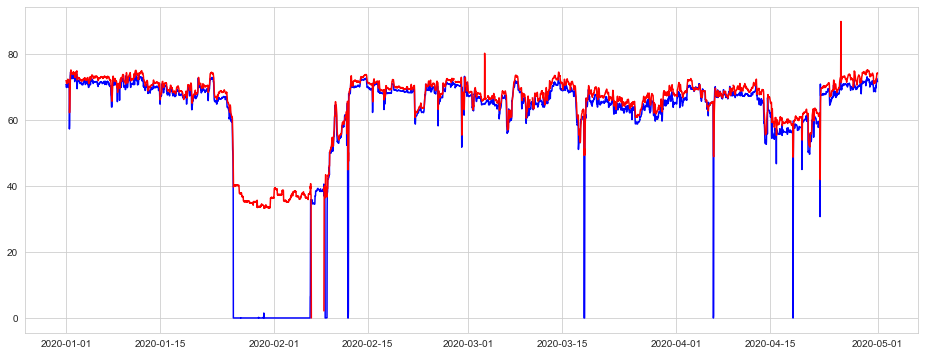

In [297]:
plt.figure(figsize=(16, 6))
plt.plot(train_df['timestamp'], train_df['A_rate'], color='blue');
plt.plot(train_df['timestamp'], train_df['B_rate'], color='red');

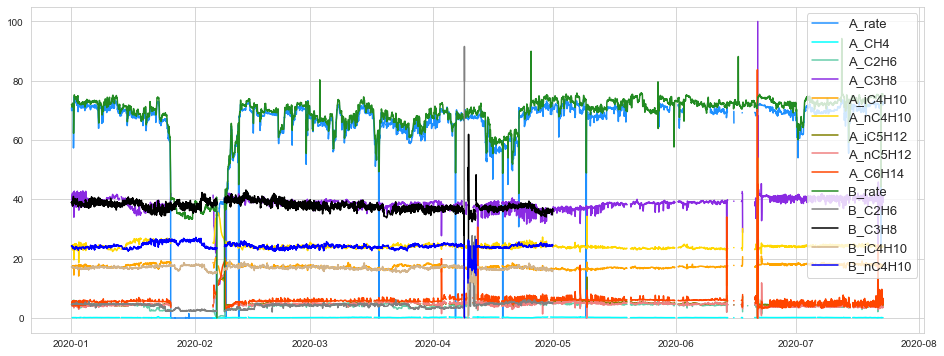

In [307]:
k = 3
plt.figure(figsize=(16, 6))
# colors = [plt.get_cmap('rocket_r')(i) for i in np.linspace(0, 1, len(feature_columns))]
# colors_targets = [plt.get_cmap('spring_r')(i) for i in np.linspace(0, 1, len(target_columns))]
for i, feature in enumerate(feature_columns):
    plt.plot(all_df['timestamp'], all_df[feature], color=color_names[i], label=feature)
for i, target in enumerate(target_columns):
    plt.plot(all_df['timestamp'], all_df[target], color=color_names[i+len(feature_columns)], label=target);
plt.legend(fontsize=13);

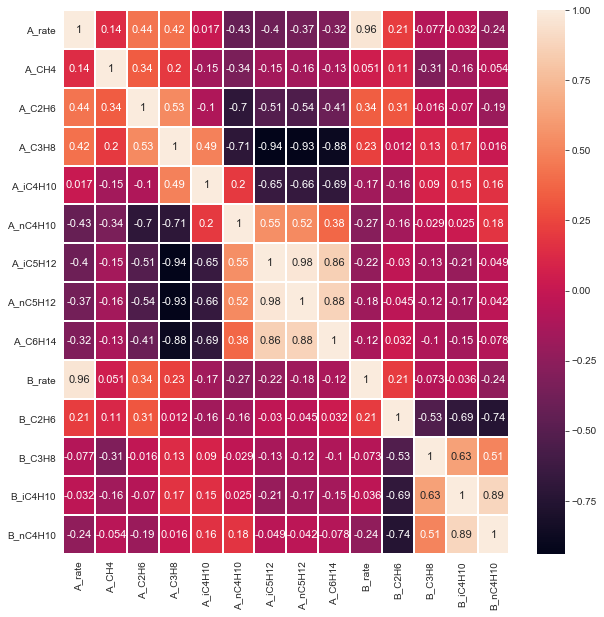

In [111]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, annot_kws={'size': 11}, linewidths=1);

## Модели

In [526]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, train_test_split

def mape(y_true: np.array, y_pred: np.array, ignore_zeros: bool=True) -> float:
    """
    Подсчитывает MAPE
    """
    not_null_idxs = np.logical_not(np.isnan(y_true))
    
    if ignore_zeros:
        return np.mean(
            np.abs((y_true[(y_true != 0) & not_null_idxs] - y_pred[(y_true != 0) & not_null_idxs]) 
                   / y_true[(y_true != 0) & not_null_idxs])
        )
    else:
        return np.mean(
            np.abs((y_true[not_null_idxs] - y_pred[not_null_idxs]) / (y_true[not_null_idxs] + 1e-120))
        )    
    
    
def compute_lags(df: pd.DataFrame, lags_list: list, column_for_lags_name: str=None, 
                 time_col_name: str='timestamp') -> pd.DataFrame:
    """
    Args:
        df: датафрейм с колонками [time_col_name, column_for_lags_name]
        lags_list: какие лаги считать
        column_for_lags_name: название колонки для которой считать лаги
        time_col_name: название временнОй колонки
    Returns:
        pd.DataFrame с лагами column_for_lags_name колонки
    """
    
    if column_for_lags_name is None:
        column_for_lags_name = [col for col in df.columns if col != time_col_name][0]
    
    tmp_df = df.copy()
    tmp_df = tmp_df.sort_values(by=[time_col_name], ascending=True)
    
    tmp_df = pd.DataFrame(
        pd.concat([
            tmp_df[[time_col_name]],
            pd.concat([tmp_df[column_for_lags_name].shift(periods=lag) for lag in lags_list], axis=1)
        ], axis=1)
    )
    tmp_df.columns = [time_col_name] + [column_for_lags_name + f'_{lag}' for lag in lags_list]
    return tmp_df

In [380]:
# Добавляем лаги временных рядов:
X = all_df.copy().sort_values(['timestamp'], ascending=True).reset_index(drop=True)
for col in tqdm(train_df.columns):
    if col == 'timestamp':
        continue
    tmp_df = compute_lags(df=all_df[['timestamp', col]], lags_list=[lag for lag in range(-30, 30+1) if lag != 0])\
                    .drop(['timestamp'], axis=1).reset_index(drop=True)
    X = pd.concat([X, tmp_df], axis=1)
    

### LightGBM

In [114]:
import lightgbm as lgb

In [565]:
for target_col in target_columns:
    model = lgb.LGBMRegressor()
    model.fit(X=train_df[feature_columns], y=train_df[target_col])
    sample_sub_df[target_col] = model.predict(X=test_df[feature_columns])

In [568]:
sample_sub_df.to_csv('/Users/tony/Desktop/sibur_dummy_submit.csv', index=False)

In [596]:
sample_sub_df = pd.read_csv('./raw_data/sample_submission.csv')
# submit = pd.read_csv('/Users/tony/Desktop/sibur_dummy_submit.csv')

In [576]:
submit.sum(axis=1)

82.44497275609685

In [580]:
submit.sum(axis=1).values

array([82.71011652, 82.41255068, 81.91832256, ..., 84.4150217 ,
       84.76556069, 84.24035966])

In [590]:
tmp_df = ((submit[target_columns] * 83.12075030739643 / submit.sum(axis=1).values.reshape(-1, 1)))
tmp_df

,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,5.595233,36.422205,16.579737,24.523576
1,5.211192,36.525675,16.715023,24.668861
2,5.009802,36.621613,16.762824,24.726511
3,5.093067,36.714674,16.676361,24.636648
4,5.123111,36.694318,16.672450,24.630871
5,5.039864,36.728345,16.698830,24.653712
6,5.126312,36.654398,16.693782,24.646259
7,5.114072,36.680122,16.688337,24.638220
8,5.154345,36.534693,16.749121,24.682591
9,5.126393,36.328348,16.711335,24.954674


In [592]:
sample_sub_df = pd.concat([sample_sub_df[['timestamp']].reset_index(drop=True), 
                           tmp_df.reset_index(drop=True)], axis=1)

In [595]:
sample_sub_df.to_csv('/Users/tony/Desktop/sibur_dummy_submit2.csv', index=False)

In [544]:
cross_scores = {}
for target_col in tqdm(target_columns):
    cross_scores[target_col] = {'train': [], 'val': []}
    for train_fold, val_fold in TimeSeriesSplit(n_splits=7).split(train_df):
        
        nonnull_idxs = np.logical_not(np.isnan(train_df[target_col][train_fold].values))
        
        model = lgb.LGBMRegressor()
        model.fit(
            X=train_df.loc[train_fold, feature_columns].values[nonnull_idxs],
            y=train_df[target_col][train_fold].values[nonnull_idxs]
        )
        
        train_mape = mape(
            y_true=train_df[target_col][train_fold].values,
            y_pred=model.predict(train_df.loc[train_fold, feature_columns].values)
        )
        
        val_mape = mape(
            y_true=train_df[target_col][val_fold].values,
            y_pred=model.predict(train_df.loc[val_fold, feature_columns].values)
        )
        cross_scores[target_col]['train'].append(train_mape)
        cross_scores[target_col]['val'].append(val_mape)
        

In [545]:
cross_scores

{'B_C2H6': {'train': [0.0060081665320970085,
   0.01726840550314975,
   0.025786712394539318,
   0.028139893620284354,
   0.028449179819430053,
   0.030391152829245413,
   0.08019262759001816],
  'val': [0.3902410046896208,
   0.26198037741757824,
   0.21774256031553335,
   0.09142745604311008,
   0.16178201094034111,
   0.24360216344461694,
   0.20837604810062352]},
 'B_C3H8': {'train': [0.003974090759637361,
   0.007517748748083332,
   0.010334606785986942,
   0.010855100818538908,
   0.011302713864889347,
   0.011710073685188107,
   0.8046149429014235],
  'val': [0.04009656221003468,
   0.04341114560940668,
   0.03170474348467608,
   0.03594503824682697,
   0.038806748004989775,
   13.937006961607436,
   0.03522365628636087]},
 'B_iC4H10': {'train': [0.001974694328197688,
   0.0046687275119322875,
   0.009811303306276694,
   0.00964913709008688,
   0.009713058036395078,
   0.010269936738814147,
   0.7267888573647783],
  'val': [0.03148285109236019,
   0.05312256308863278,
   0.02262

### Ответ

In [383]:
sample_sub_df = pd.read_csv('./raw_data/sample_submission.csv')

In [424]:
sample_sub_df

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
5,2020-05-01 02:30:00,4.363701,37.742757,16.843028,24.171264
6,2020-05-01 03:00:00,4.363701,37.742757,16.843028,24.171264
7,2020-05-01 03:30:00,4.363701,37.742757,16.843028,24.171264
8,2020-05-01 04:00:00,4.363701,37.742757,16.843028,24.171264
9,2020-05-01 04:30:00,4.363701,37.742757,16.843028,24.171264
